# Data Source

Our data comes from the [Network Repository](https://networkrepository.com/inf-power.php), a scientific data repository for graph and network data from a variety of domains.

For this study, we use the [Infrastructural Power Grid network dataset](https://networkrepository.com/inf-power.php). This dataset represents the power grid of the western states of the United States. Each node represents a power station or substation, and the edges represent transmission lines between them. 

The citation for the dataset:

```bibtex
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={https://networkrepository.com},
     year={2015}
}

@article{watts1998collective,
     title={Collective dynamics of small-world networks},
     author={Watts, Duncan J and Strogatz, Steven H},
     journal={nature},
     volume={393},
     number={6684},
     pages={440--442},
     year={1998},
     publisher={Nature Publishing Group} 
}



# Data Description

The network analysed is a complex network that models the Western United States power grid. The nodes in this network represent power stations, while the edges are the transmission lines connecting these stations. 

This network it's a real-world example of a large-scale infrastructure. It is a valuable resource for studying the impact of various failure scenarios and understanding the structural vulnerabilities of critical infrastructure networks. 

The structure of an electrical grid is largely influenced by its underlying context, the distribution of the human population and the electricity demand.
Its properties include scale-free and small-world characteristics, as many human-made networks. Analysis of this network can be used to increase resilience against unexpected disruptions, aiming for more reliable and stable power grid.


# Table of Content

1. Research Question and Network Creation
2. Network Analysis
3. Comparison with ER, BA, and WS Models
4. Centrality Analysis
5. Failures Analysis
6. Conclusions

## 1 - Research Question and Network Creation

### Research Questions

This analysis focuses on the network's characteristics and structural integrity.

The central research question driving our inquiry is: 

*Which nodes in the network are most critical to its overall stability and efficiency?*

### Importing Data and Network Creation

To create a network from this dataset, we will:

- Load the dataset into Python
- Create a graph object using the networkx library
- Plot the network

In [49]:
# Importing needed libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pyvis.network import Network
import heapq
import itertools
import operator
import random


In [2]:
# Import, check for missing values, and show data set
df = pd.read_csv('PowerNetwork.csv')
print('Missing values count:', df.isnull().sum(), sep='\n')
df

Missing values count:
Station    0
Link       0
dtype: int64


,Station,Link
0,387,1
1,396,1
2,452,1
3,3554,2
4,3587,2
...,...,...
6589,4935,4934
6590,4940,4934
6591,4938,4936
6592,4939,4937


In [3]:
# Create an empty graph object
G = nx.Graph()

# Iterate through the DataFrame, adding edges to the graph object
for index, row in df.iterrows():
    G.add_edge(row['Station'], row['Link'])


In [4]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print('Number of Nodes:', G.number_of_nodes())
print('Number of Edges:', G.number_of_edges())


Number of Nodes: 4941
Number of Edges: 6594


### Plotting the network

We will use the networkx libraly with relies on matplotlib.


In [5]:
def plot_nx_graph(G):
    "Given a graph G, plot it"
    # Set a layout for the graph.
    pos = nx.kamada_kawai_layout(G)

    # Create figure
    plt.figure(figsize=(10,10))

    # Customize the nodes' appearance
    nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=0.5, alpha=0.7)

    # Customize the edges' appearance
    nx.draw_networkx_edges(G, pos, edge_color='black', alpha= 0.2)

    # Hide the axes
    plt.axis('off')

    plt.show()
    

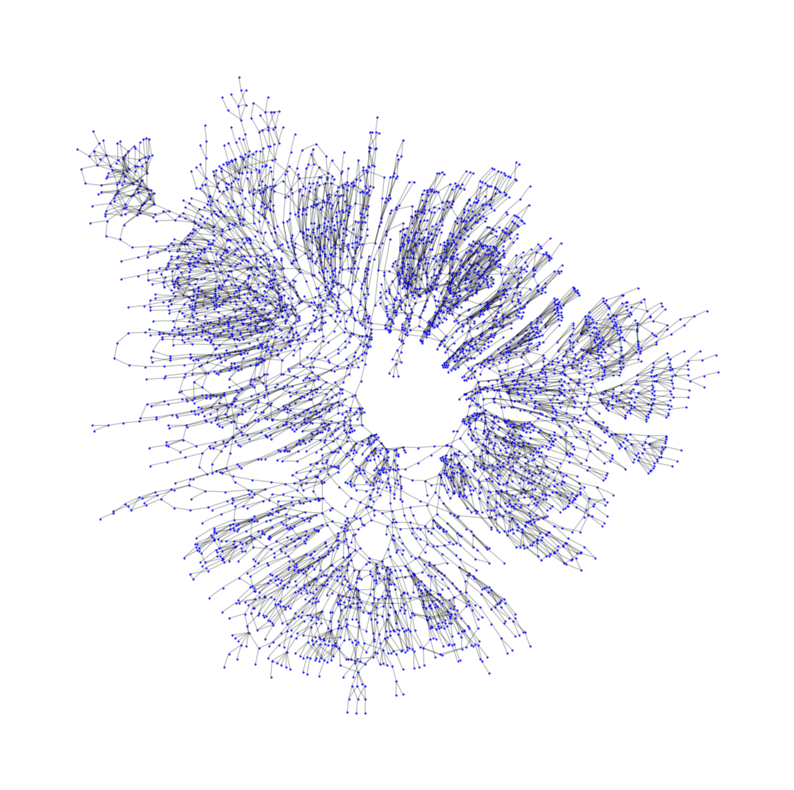

In [6]:
plot_nx_graph(G)


Our dataset represents a network of power stations and substations. In this network, 

- **Nodes**: (4941) Each node represents a power station or substation in the power grid.
- **Edges**: (6594) An edge between two nodes represents a power line connection between the stations/substations.


## 2 - Network Analysis

We will investigate the following parameters of the network:

### Network and Distribution Properties
- **Number of Nodes**: Power stations and substations. 
- **Number of Edges**: Power line connections between the stations/substations.
- **Density**: The ratio of the number of edges to the maximum possible number of edges in a network. It indicates how closely bound our network is.
- **Degrees**: The number of edges that every node has, we will investigate min, max, average and the distribution.
- **Assortativity**: The similarity of connections in the network with respect to the node degree. 
- **Number of Triangles**: Number of three nodes that are mutually connected.
- **Average Number of Triangles**: The average number of triangles each node in the network is part of in the network.
- **Maximum Number of Triangles**: The maximum number of triangles a node is part of in the network.
- **Average Clustering Coefficient**: Measures the average degree to which nodes in the network tend to cluster together. An average clustering coefficient gives an overall indication of the clustering in the network.
- **Transitivity**: The ratio of the triangles to the number of triples in the network.
- **Maximum k-core**: A k-core is a maximal subgraph that contains nodes of degree k or more.
- **Lower Bound of Maximum Clique**: The lower bound on the size of the largest clique in the network. A clique is a subset of nodes in an undirected graph such that every two distinct nodes in the clique are adjacent.

### Path Analysis
- **Diameter**: The longest shortest path between any two nodes in the network.
- **Average Shortest Path**: An indication of the average number of steps along the shortest paths for all possible pairs of network nodes.


### Connected Component Analysis

The connected components of a graph are subgraphs in which a path connects at least two nodes, which are connected to no additional nodes in the graph. For undirected graphs, every node belongs to exactly one connected component. 
In the case of the electrical grid network, we expect it to have a single giant component, as the electrical grid must be connected.

- **Molloy-Reed Criterion**: This is a mathematical criterion used to define a giant component in a graph. A giant component exists if the sum of the degrees of all nodes in the network is greater than twice the number of edges in the network.


In [7]:
def get_network_info(G):
    "Given a graph G, get all mentioned info"
    # Number of Nodes and Edges
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    # Density
    density = nx.density(G)

    # Maximum, Minimum, and Average degree
    degree_seq = [deg for node, deg in G.degree()]
    max_degree = max(degree_seq)
    min_degree = min(degree_seq)
    avg_degree = sum(degree_seq) / num_nodes

    # Assortativity
    assortativity = nx.degree_assortativity_coefficient(G)

    # Number of triangles and Average number of triangles
    triangles = nx.triangles(G)
    num_triangles = sum(triangles.values()) / 3
    avg_triangles = num_triangles / num_nodes

    # Maximum number of triangles
    max_triangles = max(triangles.values())

    # Average clustering coefficient
    avg_clustering_coeff = nx.average_clustering(G)

    # Transitivity
    transitivity = nx.transitivity(G)

    # Maximum k-core
    k_core = nx.core_number(G)
    max_kcore = max(k_core.values())

    # Lower bound of Maximum Clique
    lower_bound_max_clique = nx.graph_clique_number(G)

    # Find the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)

    # Create a subgraph of G consisting only of this component
    G2 = G.subgraph(largest_cc)

    # Now we can safely compute the diameter
    diameter = nx.diameter(G2)

    # Average Shortest Path Length
    avg_shortest_path_length = nx.average_shortest_path_length(G2)

    # Combine all metrics in a dictionary
    network_info = {
        'Number of Nodes': num_nodes,
        'Number of Edges': num_edges,
        'Density': density,
        'Max Degree': max_degree,
        'Min Degree': min_degree,
        'Average Degree': avg_degree,
        'Assortativity': assortativity,
        'Number of Triangles': num_triangles,
        'Average Number of Triangles': avg_triangles,
        'Maximum Number of Triangles': max_triangles,
        'Average Clustering Coefficient': avg_clustering_coeff,
        'Transitivity': transitivity,
        'Maximum k-core': max_kcore,
        'Lower Bound of Maximum Clique': lower_bound_max_clique,
    }

    return network_info


In [8]:
def plot_graph_properties(g):
    "Given a graph G, plot degree, triangle and clustering distributions"
    plt.figure(figsize=(14, 6))

    # Degree Distribution
    degree_sequence = [deg for node, deg in g.degree()]
    degrees, degree_freq = np.unique(degree_sequence, return_counts=True)
    degree_freq = degree_freq / degree_freq.sum()
    plt.subplot(131)
    plt.scatter(degrees, degree_freq, color='b')
    plt.plot(degrees, degree_freq, color='grey')
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

    # Triangle Distribution
    triangle_sequence = list(nx.triangles(g).values())
    triangles, triangle_freq = np.unique(triangle_sequence, return_counts=True)
    triangle_freq = triangle_freq / triangle_freq.sum()
    plt.subplot(132)
    plt.scatter(triangles, triangle_freq, color='b')
    plt.plot(triangles, triangle_freq, color='grey')
    plt.title("Triangle Distribution")
    plt.xlabel("Triangles")
    plt.ylabel("Frequency")

    # Clustering Coefficient Distribution
    clustering_sequence = list(nx.clustering(g).values())
    clusterings, clustering_freq = np.unique(clustering_sequence, return_counts=True)
    clustering_freq = clustering_freq / clustering_freq.sum()
    plt.subplot(133)
    plt.scatter(clusterings, clustering_freq, color='b')
    plt.plot(clusterings, clustering_freq, color='grey')
    plt.title("Clustering Coefficient Distribution")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")

    # Show the plot
    plt.tight_layout()
    plt.show()


In [9]:
def plot_degree_correlations(G):
    "Given a graph G, plot the degree correlation as a scatter and hexbin plots"
    # Calculate degree correlations
    degrees = dict(nx.degree(G))
    avg_degrees = nx.average_neighbor_degree(G)

    # Create two plots
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Scatter plot
    ax[0].scatter(list(degrees.values()), list(avg_degrees.values()), alpha=0.1)
    ax[0].set_xlabel('Degree')
    ax[0].set_ylabel('Average Neighbor Degree')
    ax[0].set_title('Scatter plot of Degree Correlations')

    # Define a colormap
    cmap = plt.cm.get_cmap("Blues").copy()
    cmap.set_under('white', 0.2)  
    
    # Hexbin plot
    hb = ax[1].hexbin(list(degrees.values()), list(avg_degrees.values()), gridsize=20, cmap=cmap, mincnt=1)
    cb = fig.colorbar(hb, ax=ax[1])
    cb.set_label('counts')
    ax[1].set_facecolor('white')
    ax[1].set_xlabel('Degree')
    ax[1].set_ylabel('Average Neighbor Degree')
    ax[1].set_title('Hexbin plot of Degree Correlations')

    plt.show()
    

In [10]:
def degree_statistics(G):
    "Given a graph G, compute and show the statistics of the degree distribution"
    degree_sequence = dict(G.degree()).values()

    degree_distribution = pd.DataFrame(degree_sequence, columns=['Degree'])

    # Return the statistics of the degree distribution
    print("\tDegree distribution statistics:\n")
    display(degree_distribution.describe().T)


In [11]:
def molloy_reed_giant_components(G):
    "Given a graph G, find Molloy-Reed giant components"
    # Get connected components
    components = [G.subgraph(c) for c in nx.connected_components(G)]
    
    # Initialize dictiony and counter
    giant_components = dict()
    count = 0

    # Check if component is a Molloy-Reed giant component
    for component in components:
        average_degree = sum(dict(component.degree()).values()) / component.number_of_nodes()
        if average_degree > 1:
            count += 1
            giant_components["Giant Component " + str(count)] = list(component.nodes())
    
    return giant_components, count


def is_single_giant_component(G, log=False):
    """
    Returns True if there is only one giant component that includes all nodes in the graph, otherwise False.
    If log is set to True, it also prints the number of giant components and the number of nodes in them.
    """
    giant_components, count = molloy_reed_giant_components(G)
    
    all_nodes = set(G.nodes())
    for component, nodes in giant_components.items():
        all_nodes -= set(nodes)
        
    if log:
        print('\tMolloy Reed Gigant Components\n')
        for component, nodes in giant_components.items():
            print(f"{component}: {len(nodes)} nodes")
        print(f"Total number of giant components: {count}")
        print(f"Nodes not in a giant component: {len(all_nodes)}")
        
    return count == 1 and len(all_nodes) == 0


		NETWORK ANALYSIS



{'Number of Nodes': 4941,
 'Number of Edges': 6594,
 'Density': 0.0005403026973346214,
 'Max Degree': 19,
 'Min Degree': 1,
 'Average Degree': 2.66909532483303,
 'Assortativity': 0.0034569877442048825,
 'Number of Triangles': 651.0,
 'Average Number of Triangles': 0.13175470552519733,
 'Maximum Number of Triangles': 21,
 'Average Clustering Coefficient': 0.08010361108159714,
 'Transitivity': 0.10315322452860086,
 'Maximum k-core': 5,
 'Lower Bound of Maximum Clique': 6}

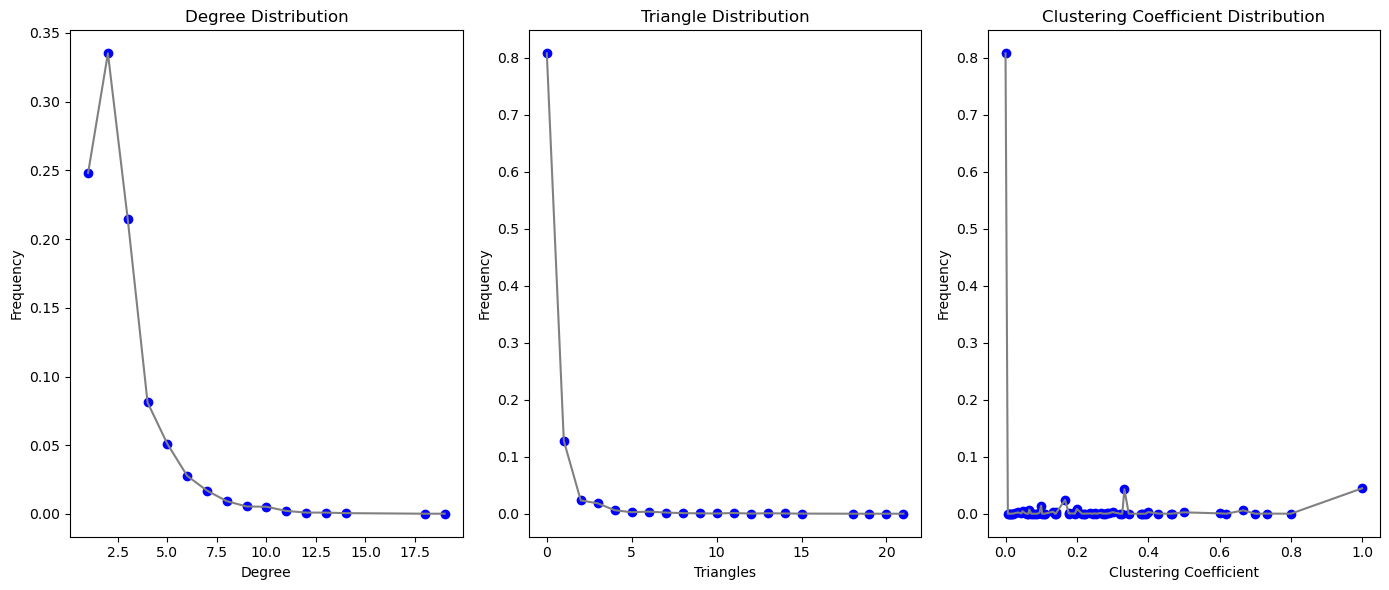

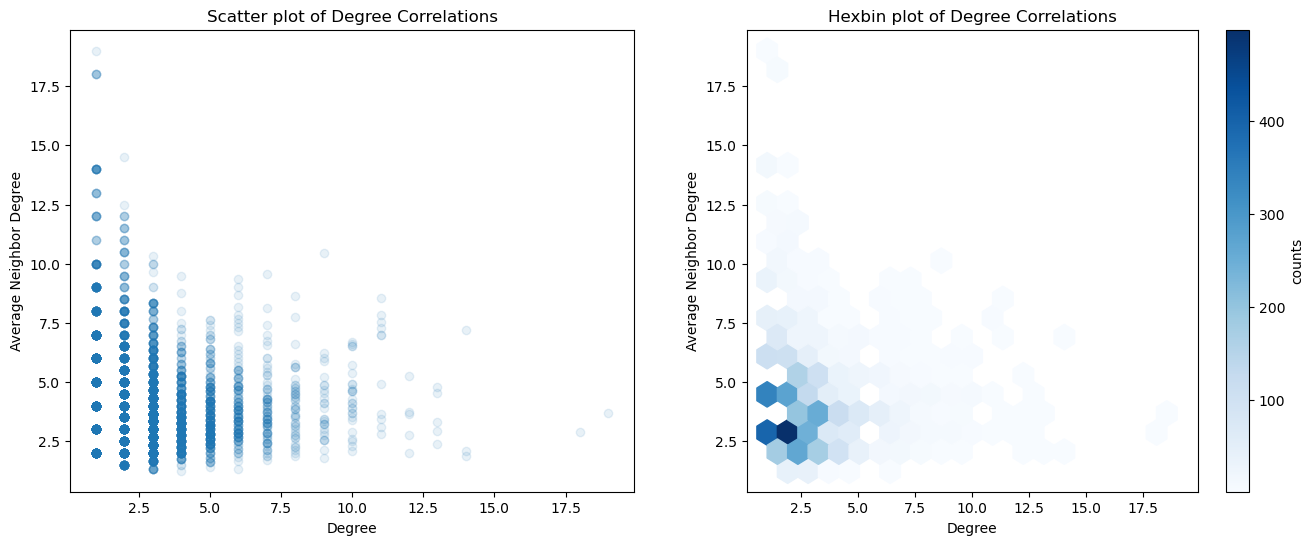

	Degree distribution statistics:



,count,mean,std,min,25%,50%,75%,max
Degree,4941.0,2.669095,1.791454,1.0,2.0,2.0,3.0,19.0


	Molloy Reed Gigant Components

Giant Component 1: 4941 nodes
Total number of giant components: 1
Nodes not in a giant component: 0


In [12]:
G_info = get_network_info(G)

print('\t\tNETWORK ANALYSIS\n')
display(G_info)
plot_graph_properties(G)
plot_degree_correlations(G)
degree_statistics(G)
_ = is_single_giant_component(G, log=True)



### Interpreting the Results

Our analysis of the network dataset has revealed some interesting aspects. The network consists of 4941 nodes and 6594 edges, which suggests it's pretty sparse given its density value of approximately 0.0005.

The mean degree of nodes within the network is about 2.67, ranging between a minimum degree of 1 and a maximum of 19. The degree distribution reveals a positive skewness, highlighting that most nodes possess a degree between 1 and 3. This observation shows that the network structure is dominated by nodes with relatively few connections, and occasional 'hub' nodes maintain an extensive array of links. Additionally, the common occurrence of degree 2 shows that many nodes form linear connections, a trait expected in the more remote areas of a power grid network.

The network manifests a slightly positive assortativity coefficient, nearly 0.0035, suggesting nodes' mild tendency to connect with other nodes of similar degrees, although the effect is weak.

The network's average clustering coefficient is approximately 0.08, with a transitivity measure close to 0.10; this implies that the network nodes aren't densely clustered, and the node's neighbours are likely not to be connected themselves.

We find that the maximum k-core of the network is 5, and the maximum clique's lower bound is 6, reinforcing the previous hypothesis that the network lacks dense subgroups of highly interconnected nodes.

Furthermore, the network's diameter measures 46, while the average shortest path length approximates 19. These values show the extensive spread of the network and that electricity across the network could necessitate traversing numerous stations and substations.

In summary, the analysed network emerges as a sparse infrastructure characterised by few hub nodes and low clustering, and relatively large network spread.

## 3 - Comparison with ER, BA, and WS Models

A beneficial approach to understand a network's properties involves comparing it with well-recognised models. We'll compare our graph whith three distinct models: the Erdős–Rényi (ER), Watts–Strogatz (WS) models, and Barabási–Albert (BA).

**The Erdős–Rényi (ER) model** generates a random graph given a specific number of nodes and edges. The presence of each possible edge between a pair of nodes is determined independently and randomly. The ER model is a valuable reference point to investigate a random network formation process.

**The Watts–Strogatz (WS) model** produces a random graph with small-world properties like high clustering coefficients and short average path lengths. This model can mirror the 'small-world' characteristic found in many real networks.

**The Barabási–Albert (BA) model** builds a random graph by sequentially adding nodes to the network. Each new node connects to existing nodes with a probability proportional to their degree. This model encapsulates the preferential attachment process, observable in many real-world networks.


### ER Model

		Erdős-Rényi Graph Analysis




{'Number of Nodes': 4941,
 'Number of Edges': 6642,
 'Density': 0.0005442357469967479,
 'Max Degree': 12,
 'Min Degree': 0,
 'Average Degree': 2.6885245901639343,
 'Assortativity': -0.008709963290262527,
 'Number of Triangles': 3.0,
 'Average Number of Triangles': 0.0006071645415907711,
 'Maximum Number of Triangles': 1,
 'Average Clustering Coefficient': 0.0006302946193656576,
 'Transitivity': 0.0005085033052714843,
 'Maximum k-core': 2,
 'Lower Bound of Maximum Clique': 3}

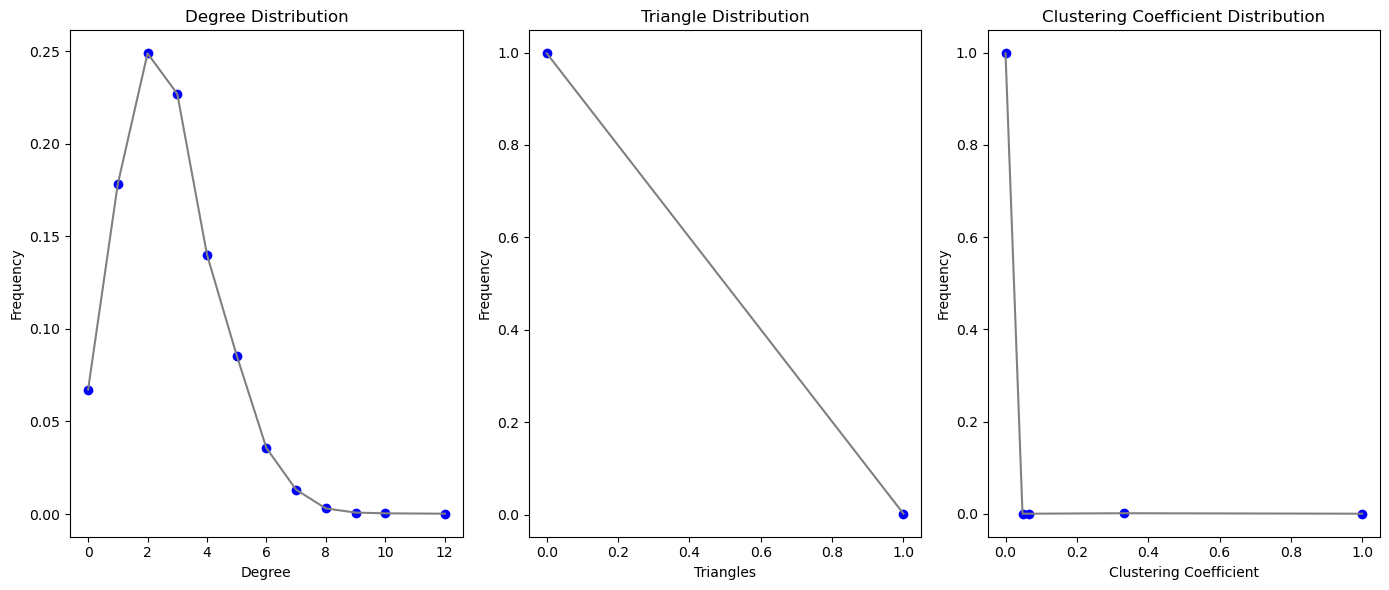

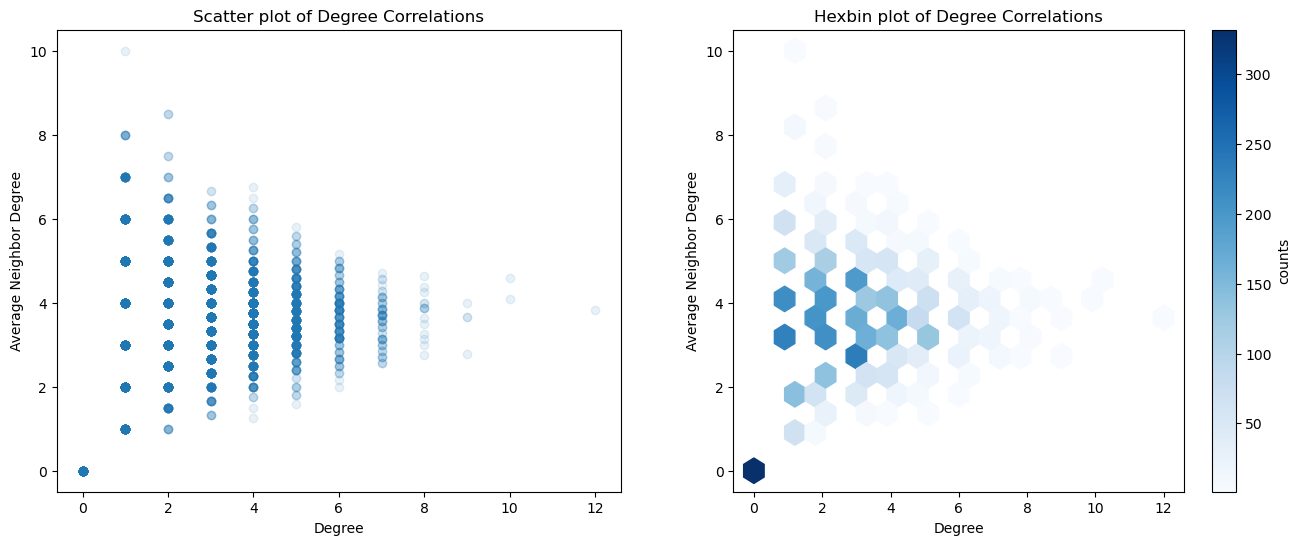

	Degree distribution statistics:



,count,mean,std,min,25%,50%,75%,max
Degree,4941.0,2.688525,1.620194,0.0,2.0,3.0,4.0,12.0


	Molloy Reed Gigant Components

Giant Component 1: 4513 nodes
Giant Component 2: 5 nodes
Giant Component 3: 3 nodes
Giant Component 4: 3 nodes
Giant Component 5: 4 nodes
Giant Component 6: 3 nodes
Giant Component 7: 3 nodes
Giant Component 8: 3 nodes
Giant Component 9: 3 nodes
Giant Component 10: 3 nodes
Total number of giant components: 10
Nodes not in a giant component: 398


In [13]:
# Extract the number of nodes and the density from your graph
n = G.number_of_nodes()
p = nx.density(G)

# Create the Erdős-Rényi graph
ER_graph = nx.erdos_renyi_graph(n, p)
ER_info = get_network_info(ER_graph)


# Print its properties and plot its distributions
print("\t\tErdős-Rényi Graph Analysis\n\n")
display(ER_info)
plot_graph_properties(ER_graph)
plot_degree_correlations(ER_graph)
degree_statistics(ER_graph)
_ = is_single_giant_component(ER_graph, log=True)


### WS Model

		Watts-Strogatz Analysis




{'Number of Nodes': 4941,
 'Number of Edges': 4941,
 'Density': 0.0004048582995951417,
 'Max Degree': 5,
 'Min Degree': 1,
 'Average Degree': 2.0,
 'Assortativity': -0.11810793300182493,
 'Number of Triangles': 0.0,
 'Average Number of Triangles': 0.0,
 'Maximum Number of Triangles': 0,
 'Average Clustering Coefficient': 0.0,
 'Transitivity': 0,
 'Maximum k-core': 2,
 'Lower Bound of Maximum Clique': 2}

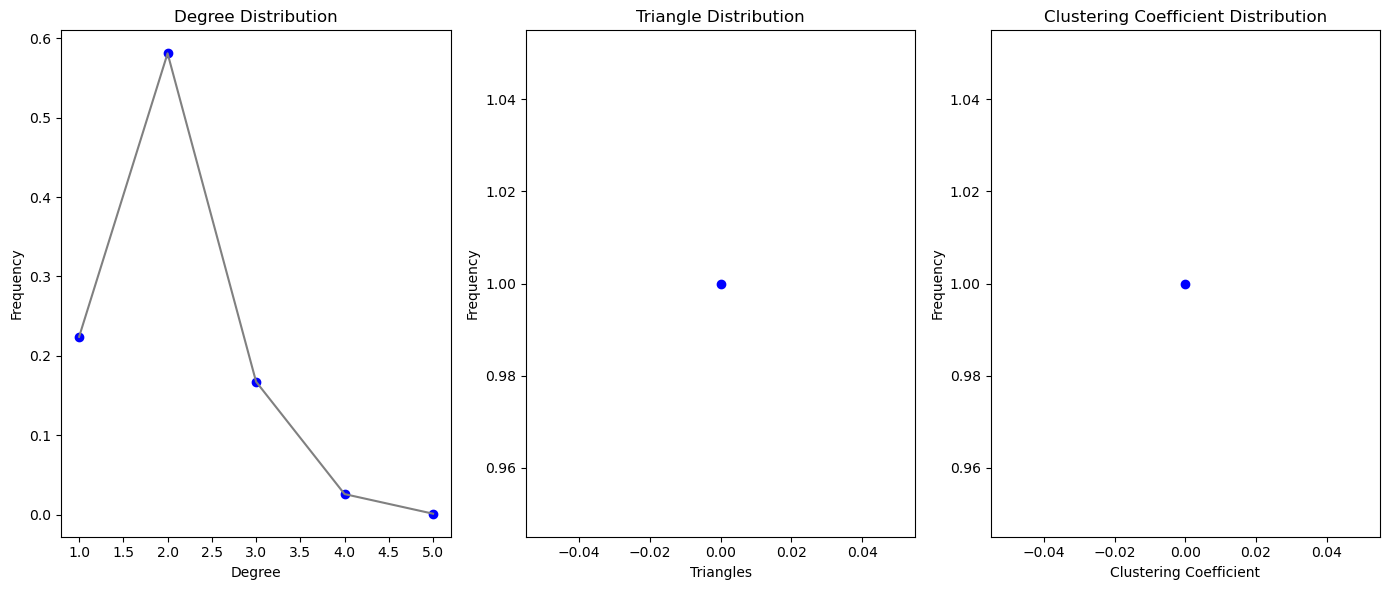

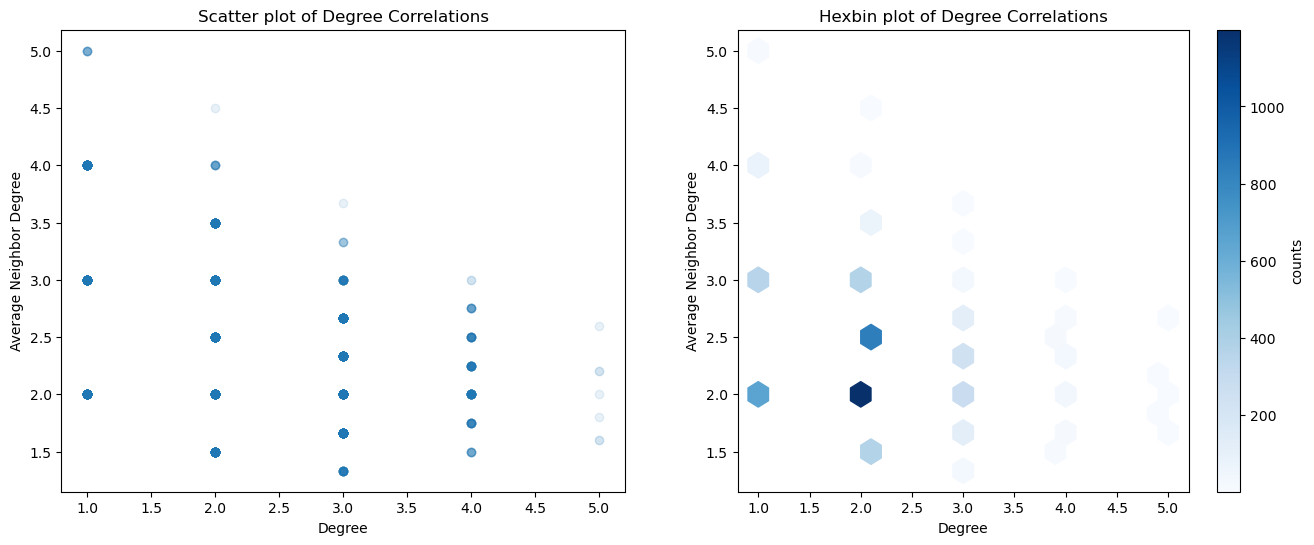

	Degree distribution statistics:



,count,mean,std,min,25%,50%,75%,max
Degree,4941.0,2.0,0.713377,1.0,2.0,2.0,2.0,5.0


	Molloy Reed Gigant Components

Giant Component 1: 1439 nodes
Giant Component 2: 2603 nodes
Giant Component 3: 841 nodes
Giant Component 4: 58 nodes
Total number of giant components: 4
Nodes not in a giant component: 0


In [14]:
# Average degree of your graph
avg_degree = round(sum(dict(G.degree()).values()) / len(G))

# Watts-Strogatz Model (Small-World Network)
WS_graph = nx.watts_strogatz_graph(n, avg_degree, 0.3)
WS_info = get_network_info(WS_graph)


# Print its properties and plot its distributions
print("\t\tWatts-Strogatz Analysis\n\n")
display(WS_info)
plot_graph_properties(WS_graph)
plot_degree_correlations(WS_graph)
degree_statistics(WS_graph)
_ = is_single_giant_component(WS_graph, log=True)



### BA Model

		Barabási-Albert Analysis




{'Number of Nodes': 4941,
 'Number of Edges': 14814,
 'Density': 0.0012138374519737765,
 'Max Degree': 201,
 'Min Degree': 3,
 'Average Degree': 5.9963570127504555,
 'Assortativity': -0.05202091196437742,
 'Number of Triangles': 401.0,
 'Average Number of Triangles': 0.08115766039263307,
 'Maximum Number of Triangles': 79,
 'Average Clustering Coefficient': 0.009296872164660599,
 'Transitivity': 0.005002765452224214,
 'Maximum k-core': 3,
 'Lower Bound of Maximum Clique': 4}

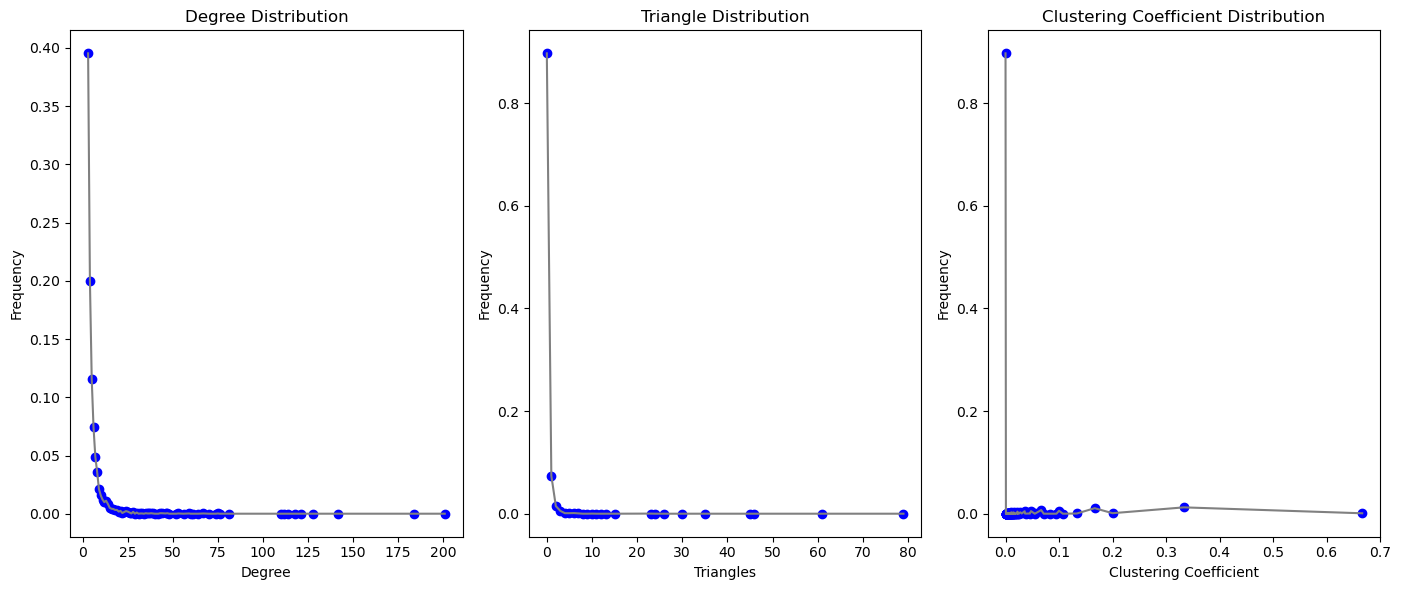

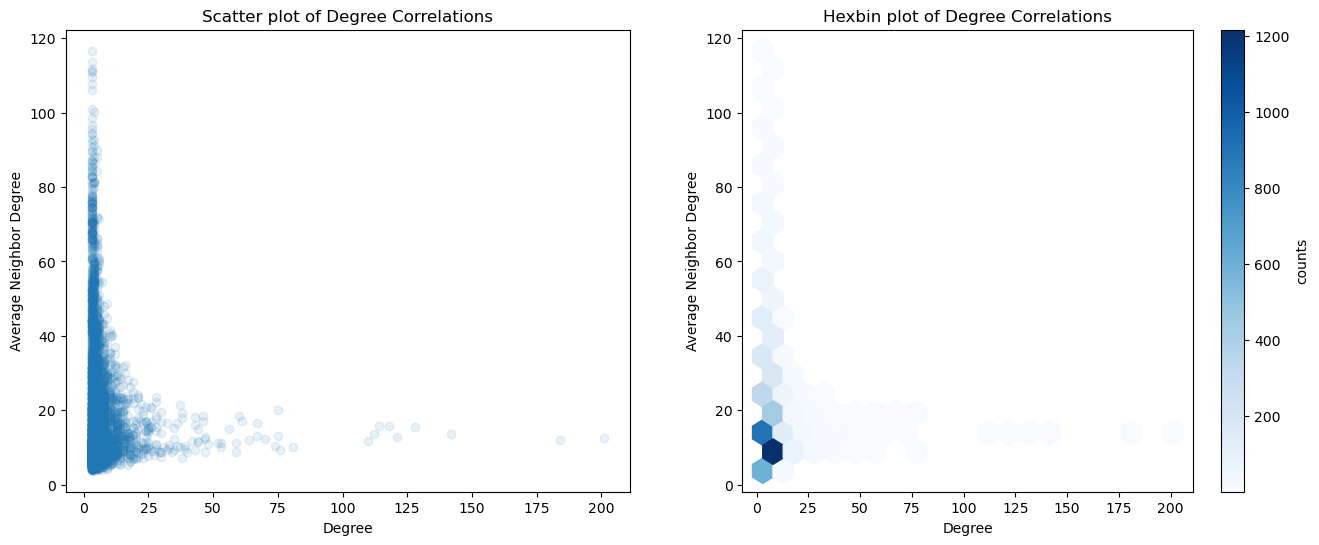

	Degree distribution statistics:



,count,mean,std,min,25%,50%,75%,max
Degree,4941.0,5.996357,8.209084,3.0,3.0,4.0,6.0,201.0


	Molloy Reed Gigant Components

Giant Component 1: 4941 nodes
Total number of giant components: 1
Nodes not in a giant component: 0


In [15]:
# Barabási-Albert Model (Scale-Free Network)
BA_graph = nx.barabasi_albert_graph(n, avg_degree)
BA_info = get_network_info(BA_graph)


# Print its properties and plot its distributions
print("\t\tBarabási-Albert Analysis\n\n")
display(BA_info)
plot_graph_properties(BA_graph)
plot_degree_correlations(BA_graph)
degree_statistics(BA_graph)
_ = is_single_giant_component(BA_graph, log=True)



In [16]:
def plot_graphs_properties(G, ER_graph, WS_graph, BA_graph):
    "Given all the graphs, plot the distributions"
    # Defining graphs, colors, lables and figure size
    graphs = [G, ER_graph, WS_graph, BA_graph]
    colors = ['#0000FF', '#AA000080', '#00800080', '#04050080']
    labels = ['Original', 'Erdos-Rényi', 'Watts-Strogatz', 'Barabási-Albert'] 
    plt.figure(figsize=(18, 6))

    # Create the plots
    for i in range(3):
        plt.subplot(1, 3, i+1)

        # Calculate the maximum x value for original graph
        if i == 0:
            max_x_orig = max([d for n, d in G.degree()])
        elif i == 1:
            max_x_orig = max(list(nx.triangles(G).values()))
        else:
            max_x_orig = max(list(nx.clustering(G).values()))

        for j, graph in enumerate(graphs):
            if i == 0:
                # Degree Distribution
                degree_sequence = [d for n, d in graph.degree()]
                degrees, counts = np.unique(degree_sequence, return_counts=True)
                plt.plot(degrees, counts/sum(counts), color=colors[j])
                plt.title("Degree Distribution")
                plt.xlabel("Degree")
                plt.ylabel("Frequency")
            elif i == 1:
                # Triangle Distribution
                triangle_sequence = list(nx.triangles(graph).values())
                triangles, counts = np.unique(triangle_sequence, return_counts=True)
                plt.plot(triangles, counts/sum(counts), color=colors[j])
                plt.title("Triangle Distribution")
                plt.xlabel("Triangles")
                plt.ylabel("Frequency")
            else:
                # Clustering Coefficient Distribution
                clustering_sequence = list(nx.clustering(graph).values())
                clusters, counts = np.unique(clustering_sequence, return_counts=True)
                plt.plot(clusters, counts/sum(counts), color=colors[j])
                plt.title("Clustering Coefficient Distribution")
                plt.xlabel("Clustering Coefficient")
                plt.ylabel("Frequency")

            # Set x limit
            plt.xlim(0, max_x_orig)

        plt.legend(labels)

    plt.tight_layout()
    plt.show()
    

,Original,Erdos-Rényi,Watts-Strogatz,Barabási-Albert
Number of Nodes,4941.000000,4941.000000,4941.000000,4941.000000
Number of Edges,6594.000000,6642.000000,4941.000000,14814.000000
Density,0.000540,0.000544,0.000405,0.001214
Max Degree,19.000000,12.000000,5.000000,201.000000
Min Degree,1.000000,0.000000,1.000000,3.000000
Average Degree,2.669095,2.688525,2.000000,5.996357
Assortativity,0.003457,-0.008710,-0.118108,-0.052021
Number of Triangles,651.000000,3.000000,0.000000,401.000000
Average Number of Triangles,0.131755,0.000607,0.000000,0.081158
Maximum Number of Triangles,21.000000,1.000000,0.000000,79.000000


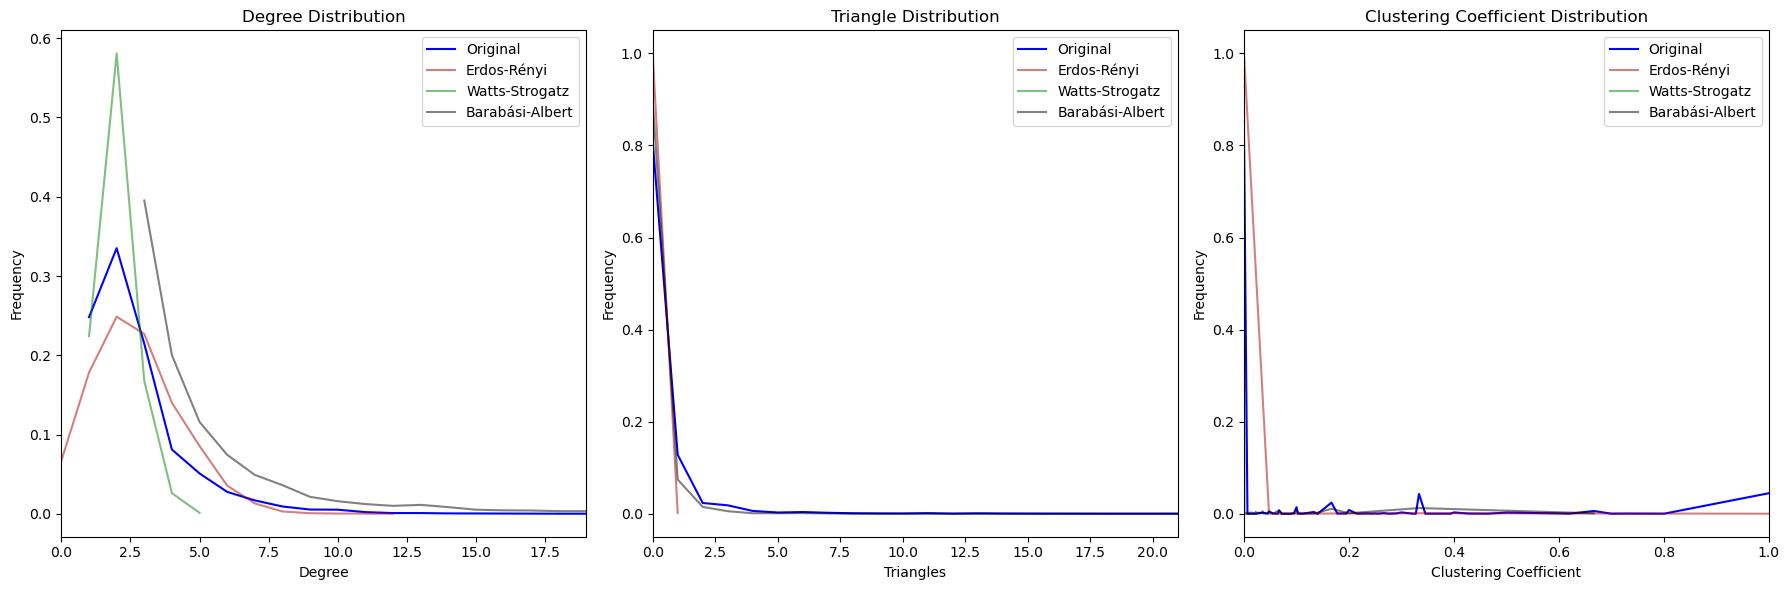

In [17]:
network_dicts = {'Original': G_info, 'Erdos-Rényi': ER_info, 'Watts-Strogatz': WS_info, 'Barabási-Albert': BA_info}
info_table = pd.DataFrame.from_dict(network_dicts)

display(info_table)
plot_graphs_properties(G, ER_graph, WS_graph, BA_graph)


### Interpreting the Results

The above analysis between our original network and the three theoretical models allows us to better understand the network's nature.

*The Erdos-Rényi model* shows a minimal presence of triangles and a low average clustering coefficient, which are in contrast to those observed in our original network. Despite aligning with the original network regarding its average degree by construction, the ER model exposes more scattered nodes with eight giant components, failing to emulate the tightly connected nature in the original network, a crucial trait for an electrical grid. We can assume that our network is not random, and underlying factors contribute to its structure.

*The Watts-Strogatz model* shows four large components, an absence of disconnected nodes, but failed to represent our network correctly. It notably lags in generating the correct number of edges and triangles, along with the network's degree distribution. The separation of gigant components and the lower maximum degree further indicates a lack of significant hub nodes crucial for an electrical grid network.

*The Barabási-Albert model* offers a better simulation for the original network, and a single gigant component is present. However, it notably overestimates the number of edges, resulting in an elevated average degree. It also generates a higher number of triangles and a larger maximum degree, suggesting the presence of highly well-connected nodes and more structure. The minimum degree of 3 shows the lack of linear connections at the periphery of the real network. While the BA model does mirror the existence of hub nodes in the original network, the extent of these highly connected nodes doesn't align accurately with our original network.

In conclusion, while the BA model succeeds in reproducing some key aspects of the original network (such as the existence of hubs and overall connectivity), but none of the three models precisely replicate all attributes of the original network. This is expected due to the complexity of real-world networks, like the electric grid, which is moulded by variables such as population distribution and electricity demand. 


### Plotting Real Network and BA Model

As we can see from the following plots, even if the BA model is the one that better rappresent our network, it is structured differently and it cannot be used to fully describe the real power grid network.

Compare the plot of the real network and the BA model
Original network


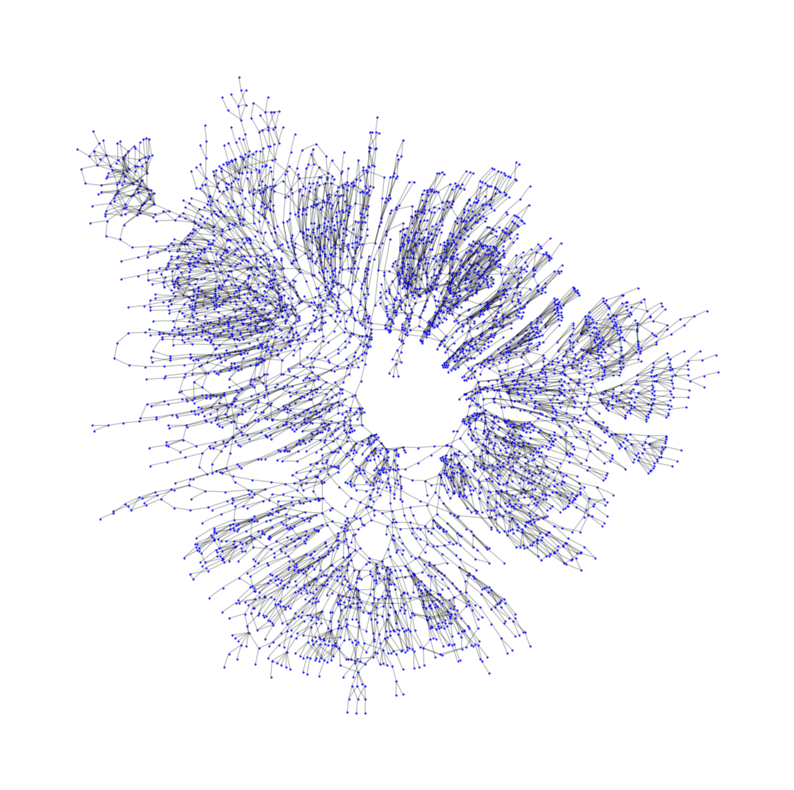

BA Model


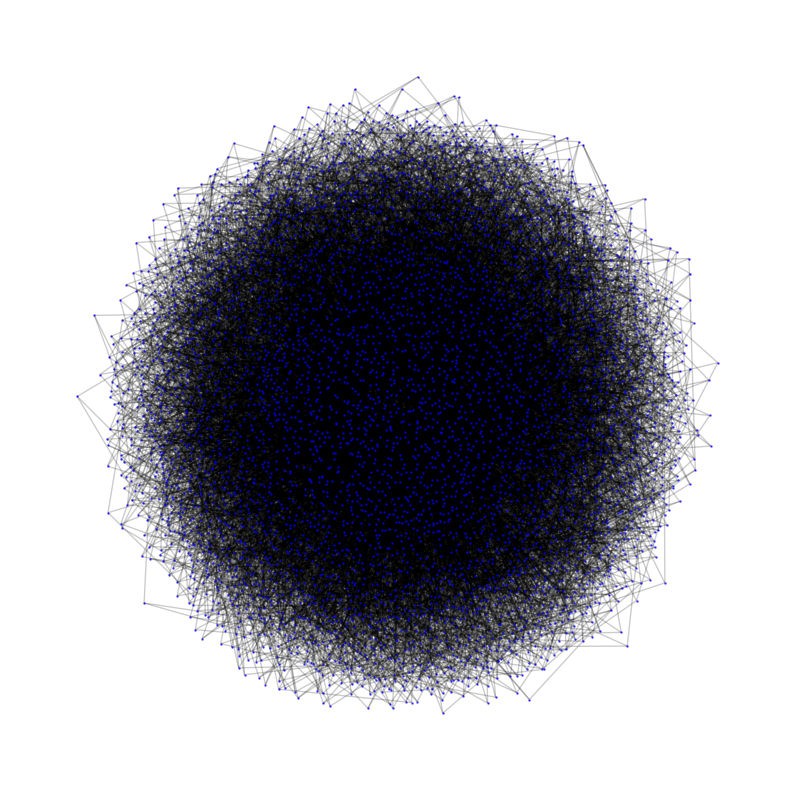

In [18]:
print('Compare the plot of the real network and the BA model')
print('Original network')
plot_nx_graph(G)
print('BA Model')
plot_nx_graph(BA_graph)


## 4 - Centrality Analysis

Centrality measures are fundamental in network analysis. They help us identify the most important nodes within a graph.

In our analysis, we consider five key centrality measures:

- **Degree Centrality**: The number of edges that a node has. The more edges a node has, the higher its degree of centrality.

- **Closeness Centrality**: The reciprocal of the sum of the length of the shortest paths between a node and all other nodes in the graph. Hence, the more central a node is, the closer it is to all other nodes.

- **Betweenness Centrality**: Quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

- **Eigenvector Centrality**: A node's influence is based on the number of links it has to other nodes within the network.

- **PageRank**: It considers a node's importance based on the number of links and the quality or significance of the linked nodes.

- **Katz Centrality**: Relative measures of centrality to all nodes in the network based on their direct and indirect connections.

- **Harmonic Centrality**: The reciprocal of the shortest distance between a node and all other nodes reachable from it. 

We will calculate all these measures for our nodes and use them to understand the distribution of power and influence in our network.


In [19]:
def get_top_n_centrality_nodes(G, n):
    "Given a graph G and a number n, get the n nodes with the highest centrality values"

    result = {}

    # Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    top_degree_centrality = dict(heapq.nlargest(n, degree_centrality.items(), key=lambda i: i[1]))
    result['Degree Centrality'] = top_degree_centrality
    
    # Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality(G)
    top_eigenvector_centrality = dict(heapq.nlargest(n, eigenvector_centrality.items(), key=lambda i: i[1]))
    result['Eigenvector Centrality'] = top_eigenvector_centrality

    # PageRank
    pagerank = nx.pagerank(G)
    top_pagerank = dict(heapq.nlargest(n, pagerank.items(), key=lambda i: i[1]))
    result['PageRank'] = top_pagerank

    # Katz Centrality
    katz_centrality = nx.katz_centrality(G)
    top_katz_centrality = dict(heapq.nlargest(n, katz_centrality.items(), key=lambda i: i[1]))
    result['Katz Centrality'] = top_katz_centrality

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G)
    top_closeness_centrality = dict(heapq.nlargest(n, closeness_centrality.items(), key=lambda i: i[1]))
    result['Closeness Centrality'] = top_closeness_centrality

    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    top_betweenness_centrality = dict(heapq.nlargest(n, betweenness_centrality.items(), key=lambda i: i[1]))
    result['Betweenness Centrality'] = top_betweenness_centrality

    # Harmonic Centrality
    harmonic_centrality = nx.harmonic_centrality(G)
    top_harmonic_centrality = dict(heapq.nlargest(n, harmonic_centrality.items(), key=lambda i: i[1]))
    result['Harmonic Centrality'] = top_harmonic_centrality

    return result


In [20]:
top_100_centrality_nodes = get_top_n_centrality_nodes(G, 100)

# Print the top 10 of each category
print('\tTop 10 nodes for each centrality metrics\n')
for title, internal_dict in top_100_centrality_nodes.items():
    print(title)
    display_dict = dict(itertools.islice(internal_dict.items(), 10))
    display(display_dict)
    print() 
    

	Top 10 nodes for each centrality metrics

Degree Centrality


{2554: 0.003846153846153846,
 4459: 0.0036437246963562753,
 832: 0.0028340080971659917,
 3469: 0.0028340080971659917,
 4346: 0.0028340080971659917,
 2543: 0.002631578947368421,
 2383: 0.002631578947368421,
 2576: 0.002631578947368421,
 2586: 0.002631578947368421,
 3896: 0.002631578947368421}


Eigenvector Centrality


{4382: 0.2865344997425941,
 4346: 0.2745147084801142,
 4337: 0.2482211281571255,
 4333: 0.24290464678318427,
 4353: 0.23627243283037444,
 4385: 0.22130755705306204,
 4403: 0.2147571103970848,
 4348: 0.21411168520513016,
 4396: 0.19782989883696145,
 4374: 0.19478919801440522}


PageRank


{4459: 0.0012151446652737086,
 832: 0.0010662806203325327,
 3469: 0.0010631478541278314,
 2554: 0.0009995633191994893,
 1225: 0.0009432354611665109,
 598: 0.0008289069036170614,
 2383: 0.0008266355777684407,
 2576: 0.000820636437237833,
 2440: 0.0008072742031778136,
 3896: 0.0007715045390118858}


Katz Centrality


{4346: 0.062390162802074066,
 4382: 0.05782384722881802,
 4337: 0.05345819006792603,
 4353: 0.05190488263960496,
 4333: 0.05176467959624836,
 4396: 0.051286057046916717,
 4385: 0.05006954994475582,
 4374: 0.04976790408492123,
 4403: 0.04643947079014295,
 2554: 0.046200051557850653}


Closeness Centrality


{1309: 0.08182330142114155,
 2595: 0.0809437981320662,
 2606: 0.08035786905246035,
 1132: 0.07987194619153098,
 2607: 0.0796260477111541,
 1244: 0.07932684587468285,
 1477: 0.07918570169111165,
 2558: 0.07911468426194328,
 2529: 0.07877280265339967,
 2533: 0.07803121248499399}


Betweenness Centrality


{4165: 0.28841562147939637,
 2544: 0.28169812331624505,
 1244: 0.2796951897344538,
 4220: 0.2776498877784976,
 2529: 0.26730447500467724,
 1268: 0.24827101665302145,
 1309: 0.2365166910499439,
 1245: 0.20523301004236488,
 427: 0.2049539625669129,
 2607: 0.20311626353593495}


Harmonic Centrality


{2607: 487.66931695701516,
 2529: 481.50386509269543,
 2544: 479.05243068864047,
 2606: 477.5360689203086,
 1309: 475.53613770817395,
 4165: 475.49683397329613,
 4220: 474.04101271870076,
 2595: 471.82900741374,
 1244: 470.46657870896655,
 1268: 470.4061832393832}

In [21]:
# Calculate Jaccard similarity between centralities
measure_names = list(top_100_centrality_nodes.keys())
jaccard_similarity = {}

for i in range(len(measure_names)):
    for j in range(i+1, len(measure_names)):
        measure1 = top_100_centrality_nodes[measure_names[i]]
        measure2 = top_100_centrality_nodes[measure_names[j]]
        
        intersection = len(set(measure1) & set(measure2))
        union = len(set(measure1) | set(measure2))
        
        jaccard_sim = intersection / union
        jaccard_similarity[(measure_names[i], measure_names[j])] = jaccard_sim
        
jaccard_similarity = dict(sorted(jaccard_similarity.items(), key=lambda x: x[1], reverse=True))


# Print the Jaccard similarity results
print('\tJaccard similarithy between each pair of centrality metrixes\n')
for measures, similarity in jaccard_similarity.items():
    print(f"Jaccard similarity between {measures[0]} and {measures[1]}: {similarity}")

    

	Jaccard similarithy between each pair of centrality metrixes

Jaccard similarity between Closeness Centrality and Harmonic Centrality: 0.6129032258064516
Jaccard similarity between Degree Centrality and PageRank: 0.5748031496062992
Jaccard similarity between Degree Centrality and Katz Centrality: 0.48148148148148145
Jaccard similarity between Closeness Centrality and Betweenness Centrality: 0.3157894736842105
Jaccard similarity between Betweenness Centrality and Harmonic Centrality: 0.3157894736842105
Jaccard similarity between PageRank and Katz Centrality: 0.28205128205128205
Jaccard similarity between Eigenvector Centrality and Katz Centrality: 0.2422360248447205
Jaccard similarity between Degree Centrality and Harmonic Centrality: 0.10497237569060773
Jaccard similarity between Degree Centrality and Betweenness Centrality: 0.0989010989010989
Jaccard similarity between Katz Centrality and Harmonic Centrality: 0.0989010989010989
Jaccard similarity between PageRank and Betweenness Cent

In [22]:
def common_nodes(top_x_centrality_nodes):
    "Given the top centralities dictionary, get common and shared nodes"
    node_centrality_types = {}
    common_nodes_all = set(next(iter(top_x_centrality_nodes.values())).keys())

    for centrality_type, centrality_dict in top_x_centrality_nodes.items():
        nodes = centrality_dict.keys()
        common_nodes_all.intersection_update(nodes)
        for node in nodes:
            if node in node_centrality_types:
                node_centrality_types[node].append(centrality_type)
            else:
                node_centrality_types[node] = [centrality_type]

    common_nodes_multiple = {node: centralities for node, centralities in node_centrality_types.items() if len(centralities) > 1}

    # Sort the dictionary by the number of times each node appears
    common_nodes_multiple = dict(sorted(common_nodes_multiple.items(), key=lambda item: len(item[1]), reverse=True))

    return common_nodes_all, common_nodes_multiple

common_all, common_multiple = common_nodes(top_100_centrality_nodes)

print(f"\tNodes present in all top 100 centralities: /n")
display(common_all)
print(f"\tNodes present in multiple top 100 centralities: /n")
for node in common_multiple.items():
    print(node)


	Nodes present in all top 100 centralities: /n


set()

	Nodes present in multiple top 100 centralities: /n
(491, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(2609, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(4459, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(2618, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(1092, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(1167, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(2587, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(1507, ['Degree Centrality', 'PageRank', 'Katz Centrality', 'Betweenness Centrality', 'Harmonic Centrality'])
(2459, ['Degree Centr

## Centrality Analysis Results Interpretation

Our analysis spotlighted several nodes that frequently appear within the top 100 for different centrality measures, underscoring their overarching importance within the network. For instance, nodes 491 and 2609 often featured among the top 100 across all but one (Eigenvector) centrality measure, reflecting their crucial role within the network's structure.

Additionally, we spotted nodes demonstrating high centrality values in specific measures, emphasising how the perceived importance of a node can vary based on the adopted perspective. For example, nodes 2543 and 2576 made it to the top 100 for Degree Centrality, PageRank, and Katz Centrality. This indicates these nodes might hold significant importance based on their direct connections and influence despite not necessarily serving as a bridge within the network, as reflected by their absence in the top 100 for Betweenness Centrality.

In our exploration, the Eigenvector and Betweenness centrality measures consistently exhibited the highest values, exceeding 0.25. This observation leads to two main interpretations:

- **High Eigenvector Centrality:** This suggests that the nodes within our network are associated with other well-connected or significant nodes. Essentially, the importance of a node escalates if it is connected to other crucial nodes. This attribute of our network implies the presence of some particularly influential nodes owing to their connections.

- **High Betweenness Centrality:** his reflects that numerous nodes within our network are essential in directing the flow of electricity through the network. These nodes often function as bridges linking distinct sections of the network, influencing electricity flow as it generally must traverse these nodes to reach other network parts.

These findings point towards a network where specific nodes, besides being associated with other essential nodes, also play vital roles in interconnecting different network sections.


## 5 - Failure Analysis

In this section, we will examine the potential impact of network failures on the overall structure of our power grid. Specifically, we will investigate how many failures would lead to the fragmentation of the network into separate components. Our analysis will occur in three stages:

1. **Random Failure Resilience:** We will initially evaluate the network's resilience to random failures. We aim to estimate the average number of nodes that can fail before the network splits into multiple disconnected components.

2. **Centrality-Based Failure Impact:** Next, we will focus on the nodes previously highlighted in the centrality analysis. By investigating their potential failure, we can understand the impact these central nodes have on overall network integrity.

3. **Impact of Articulation Points and Bridges:** In the third stage of our analysis, we will specifically inspect the network's articulation points and bridges:

    - **Articulation Points:** These nodes' removal would increase the number of connected components in the network. They play a vital role in maintaining network connectivity, and their failure could result in a significant portion of the grid to disconnect.
  
    - **Bridges:** These are edges whose removal would similarly increase the number of connected components. Like articulation points, bridges are critical for maintaining network connectivity.

We aim to investigate how many of these articulation points and bridges, upon failure, would disconnect more than 1% of the network.
Through the targeted study of these critical nodes and edges, we aim to strengthen the resilience and robustness of our network.


In [23]:
def random_node_removal_test(G, log=False):
    """
    Given a graph G, randomly removes nodes from until it no longer has a single giant component.
    Returns the number of removals required to reach this state.
    If log is True, prints the node removed and the result of is_single_giant_component at each step.
    """
    # Make a copy of the graph
    G_copy = G.copy()

    # Set the counter
    count = 0

    while is_single_giant_component(G_copy):
        # Randomly select a node to remove
        node_to_remove = random.choice(list(G_copy.nodes()))

        # Remove the node from the graph
        G_copy.remove_node(node_to_remove)

        # Increment the count of nodes removed
        count += 1

        if log:
            print(f"Removed node: {node_to_remove}")
            print('Network Resisted' if is_single_giant_component(G_copy) else 'Network Failed')
        
    return count

In [24]:
random_node_removal_test(G, log=True)

Removed node: 2817
Network Resisted
Removed node: 3815
Network Resisted
Removed node: 756
Network Resisted
Removed node: 2390
Network Resisted
Removed node: 1429
Network Resisted
Removed node: 2490
Network Failed


6

In [25]:
node_removal_test_results = list()

# Repeat the test 1% of the network size and get the statistics
for i in range(495):
    node_removal_test_results.append(random_node_removal_test(G))
    
_results = pd.DataFrame(node_removal_test_results, columns=['Results'])


In [26]:
print('Random failure test statistics:')
display(_results.describe().T)

Random failure test statistics:


,count,mean,std,min,25%,50%,75%,max
Results,495.0,4.250505,3.558345,1.0,2.0,3.0,6.0,22.0


### Failure Analysis of Cental Nodes

In [27]:
def network_resilience_test(G, nodes, log=False):
    """
    Given a graph G and a list of nodes, for each node in the given list, try to remove it from the network.
    Returns two lists: the nodes that result in network failure and the ones that result in network resilience.
    If log is True, prints the node removed and the state of the network (failed or resilient) at each step.
    """
    # Lists to store nodes that result in network failure and resilience
    failed_nodes = []
    resilient_nodes = []

    for node in nodes:
        # Make a copy of the graph
        G_copy = G.copy()

        # Try to remove the node from the graph copy
        G_copy.remove_node(node)

        # Check if the network has failed or resisted
        if not is_single_giant_component(G_copy):
            failed_nodes.append(node)
            if log:
                print(f"Removed node: {node}, Network Status: Failed")
        else:
            resilient_nodes.append(node)
            if log:
                print(f"Removed node: {node}, Network Status: Resisted")

    return failed_nodes, resilient_nodes


In [28]:
node_removal_test_results = list()

for i in range(495):
    node_removal_test_results.append(random_node_removal_test(G))
    
_results = pd.DataFrame(node_removal_test_results, columns=['Results'])


In [29]:
risky_nodes = sorted(list(common_multiple.keys()))
print('Number of risky nodes:', len(risky_nodes))

Number of risky nodes: 203


In [31]:
critical_central_nodes, resilient_nodes = network_resilience_test(G, risky_nodes)
print("Number of Critical Nodes:", len(critical_central_nodes))

print('Critical Nodes:')
print(critical_central_nodes)

Number of Critical Nodes: 91
Critical Nodes:
[70, 71, 89, 99, 117, 130, 397, 491, 598, 681, 726, 781, 804, 832, 847, 855, 1006, 1027, 1031, 1091, 1099, 1107, 1141, 1149, 1167, 1225, 1268, 1308, 1310, 1327, 1335, 1460, 1461, 1507, 1531, 1555, 2222, 2250, 2283, 2299, 2322, 2383, 2435, 2440, 2465, 2543, 2549, 2550, 2554, 2575, 2576, 2587, 2594, 2596, 2605, 2609, 2612, 2663, 2718, 2734, 2744, 2795, 2801, 2805, 2833, 2910, 2937, 2954, 2960, 2961, 2975, 3189, 3356, 3469, 3896, 4180, 4200, 4219, 4336, 4341, 4343, 4358, 4360, 4368, 4392, 4396, 4397, 4402, 4403, 4459, 4879]


### Articulation Failure Analysis


In [32]:
def compute_disconnected_nodes(G, nodes):
    disconnected_nodes_dict = {}
    
    # Iterate over each node in the list
    for node in nodes:
        # Temporarily remove the node
        G_copy = G.copy()
        G_copy.remove_node(node)
        
        # Find the connected components and their sizes
        components = nx.connected_components(G_copy)
        component_sizes = [len(component) for component in components]
        
        # Store the number of disconnected nodes (total nodes - largest component size) 
        # in the dictionary for the current node
        total_nodes = sum(component_sizes)
        largest_component_size = max(component_sizes)
        disconnected_nodes = total_nodes - largest_component_size
        disconnected_nodes_dict[node] = disconnected_nodes
        
    return disconnected_nodes_dict

In [33]:
articulation_points = sorted(list(nx.articulation_points(G)))
print('Articulation points count:', len(articulation_points))

random_points = random.sample(articulation_points, k=10)
print("ten sample of articulation points:", random_points)

Articulation points count: 1229
ten sample of articulation points: [2816, 2481, 1548, 2687, 2978, 4203, 2660, 1031, 4012, 2545]


In [34]:
disconnected_nodes_dict = compute_disconnected_nodes(G, articulation_points)

# Creating a DataFrame from the dictionary
articulation_points_df = pd.DataFrame(list(disconnected_nodes_dict.items()), columns=['Nodes', 'Failing'])

# Sorting the DataFrame by the 'Failing' column in descending order
articulation_points_df = articulation_points_df.sort_values(by='Failing', ascending=False)

print("Top twenty critical nodes that, if failed, would result in the most disconnected nodes")
articulation_points_df.head(20).T

Top twenty critical nodes that, if failed, would result in the most disconnected nodes


,184,169,530,567,85,1032,1022,736,157,738,735,464,212,563,737,1011,1004,806,834,265
Nodes,727,693,2523,2605,363,4188,4167,3046,658,3048,3045,2283,847,2594,3047,4153,4139,3361,3469,1141
Failing,105,55,39,28,24,21,19,18,18,17,17,16,16,16,15,15,15,15,14,14


In [35]:
print('Count of nodes resulting in more than 1% grid failure:',
      len(articulation_points_df[articulation_points_df['Failing']>int(len(G.nodes)*0.01)]['Failing']))

print('\n')
print('Node   Failures')
print(articulation_points_df[articulation_points_df['Failing']>int(len(G.nodes)*0.01)]['Failing'])

Count of nodes resulting in more than 1% grid failure: 2


Node   Failures
184    105
169     55
Name: Failing, dtype: int64


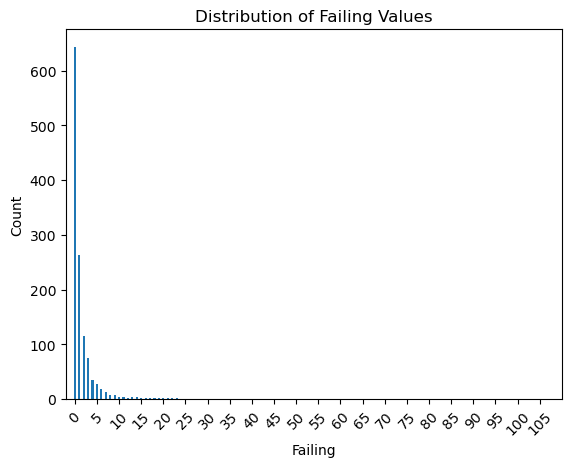

In [47]:
# Convert the index to integers and sort before plotting
articulation_points_df['Failing'].value_counts().sort_index().plot(kind='bar', xticks=range(0, 110, 5))

plt.xlim(-2, 110)  # This sets the range of x-axis
plt.xticks(rotation=45)  # This rotates x-axis labels for better visibility
plt.xlabel('Failing')
plt.ylabel('Count')
plt.title('Distribution of Failing Values')

plt.show()



### Bridges Failure Analysis

In [37]:
def compute_disconnected_nodes_after_bridge_removal(G, bridges):
    disconnected_nodes_dict = {}
    
    # Iterate over each bridge in the list
    for bridge in bridges:
        # Temporarily remove the bridge
        G_copy = G.copy()
        G_copy.remove_edge(*bridge)  # bridge is a tuple (node1, node2)
        
        # Find the connected components and their sizes
        components = nx.connected_components(G_copy)
        component_sizes = [len(component) for component in components]
        
        # Store the number of disconnected nodes (total nodes - largest component size) 
        # in the dictionary for the current bridge
        total_nodes = sum(component_sizes)
        largest_component_size = max(component_sizes)
        disconnected_nodes = total_nodes - largest_component_size
        disconnected_nodes_dict[bridge] = disconnected_nodes
        
    return disconnected_nodes_dict


In [38]:
bridges = sorted(list(nx.bridges(G)))
print('Bridges Count:', len(bridges))

random_bridges = random.sample(bridges, k=min(10, len(bridges)))
print("ten sample of bridges:", random_bridges)

Bridges Count: 1611
ten sample of bridges: [(3537, 3483), (3010, 3265), (2268, 2271), (1360, 2045), (1443, 1186), (3041, 2654), (4125, 4123), (2828, 2736), (850, 908), (4728, 4775)]


In [39]:
bridges = sorted(list(nx.bridges(G)))
print('Articulation points count:', len(bridges))

random_bridges = random.sample(bridges, k=10)
print("ten sample of articulation points:", random_bridges)

Articulation points count: 1611
ten sample of articulation points: [(3469, 3304), (130, 236), (610, 609), (1790, 1672), (3010, 3265), (2147, 2148), (1739, 1637), (4541, 4790), (4099, 4282), (2383, 2207)]


In [40]:
disconnected_bridges_dict = compute_disconnected_nodes_after_bridge_removal(G, bridges)

# Creating a DataFrame from the dictionary
bridges_df = pd.DataFrame(list(disconnected_bridges_dict.items()), columns=['Bridges', 'Failing'])

# Sorting the DataFrame by the 'Failing' column in descending order
bridges_df = bridges_df.sort_values(by='Failing', ascending=False)

print("Top twenty critical bridges that, if failed, would result in more than 1% of network disconnected")
bridges_df.head(20).T

Top twenty critical bridges that, if failed, would result in more than 1% of network disconnected


,683,684,929,932,71,930,70,1325,105,144,104,1304,928,784,939,1378,927,297,1251,1293
Bridges,"(2523, 3046)","(2523, 3048)","(3046, 3045)","(3048, 3047)","(270, 363)","(3047, 3074)","(270, 347)","(4167, 4182)","(347, 342)","(491, 2681)","(341, 342)","(4153, 4095)","(3045, 3138)","(2686, 2687)","(3074, 3071)","(4223, 4222)","(3045, 3076)","(847, 848)","(4095, 4280)","(4139, 4138)"
Failing,19,18,18,16,13,13,11,10,10,9,9,9,9,9,8,8,8,8,8,8


In [41]:
print('Count of nodes resulting in more than 1% grid failure:',
      len(bridges_df[bridges_df['Failing']>int(len(G.nodes)*0.01)]['Failing']))

print('\n')
print('Bridge  Failures')
print(bridges_df[bridges_df['Failing']>int(len(G.nodes)*0.01)]['Failing'])

Count of nodes resulting in more than 1% grid failure: 0


Bridge  Failures
Series([], Name: Failing, dtype: int64)


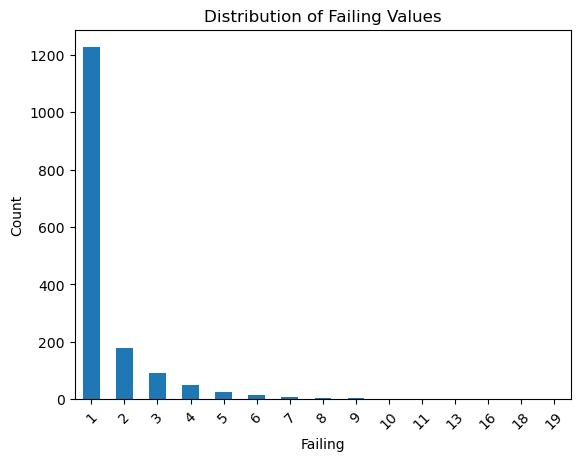

In [42]:
# Convert the index to integers and sort before plotting
bridges_df['Failing'].value_counts().sort_index().plot(kind='bar')

plt.xticks(rotation=45)  # This rotates x-axis labels for better visibility
plt.xlabel('Failing')
plt.ylabel('Count')
plt.title('Distribution of Failing Values')

plt.show()


### Network Failure Analysis Summary

#### Random Failure Test

In our random failure test, we find that, on average, the network can resist 4 node failures before disconnecting, ranging from 1 to 26. This result suggests that most nodes in the network are not critical to maintaining the overall network connectivity, and the network can withstand a few random node failures.

#### Centrality-based Failure Test

When our failure tests specifically target nodes with high centrality values, the impact of node failure significantly escalates. We identify 91 nodes among the top-ranked centrality nodes, whose failure would split the network into multiple components. This result underscores these nodes' pivotal role in maintaining the network's connectivity, suggesting that safeguarding these nodes should be a priority.

#### Articulation Points Failure Test

We also analyse the impact of articulation point failure—nodes that connect separate network components. We find 1229 articulation points in our network, and the failure of the top 20 among these would lead to 14 or more nodes becoming disconnected, with the most critical articulation point potentially disconnecting up to 105 nodes. Furthermore, the failure of 2 of these nodes could disconnect more than 1% of the network (about 49 nodes). Therefore, given their essential role in maintaining network connectivity, articulation points should also be given priority in protective measures.

#### Bridges Failure Test

Finally, we studied the impact of bridge failure. We locate 1611 bridges within our network. The loss of these bridges also results in disconnected nodes, though to a lesser extent than articulation points (with the most critical bridge potentially disconnecting up to 19 nodes). Notably, if failed, none of the bridges would disconnect more than 1% of the network. This finding implies that individual bridges are less critical than individual nodes for preserving network connectivity

### Interpreting the Results

Collectively, our results suggest that the integrity of the network is mainly influenced by a relatively small subset of nodes with high centrality values or that act as articulation points. While the network seems resilient to a few random failures, targeted failures or attacks on these critical nodes would significantly disrupt network connectivity. Consequently, efforts to maintain network integrity should prioritise these critical nodes.


### Plotting the Network

The followinc plot will show the network, highliting the critical articulation nodes in red and the critical central points in orange.

In [48]:
critical_articuplations = articulation_points_df[articulation_points_df['Failing']>int(len(G.nodes)*0.01)]['Nodes'].to_list()
    
print('Critical Articulation Points:', sorted(critical_articuplations))
print('Critical Central Nodes:',  sorted(critical_central_nodes))

Critical Articulation Points: [693, 727]
Critical Central Nodes: [70, 71, 89, 99, 117, 130, 397, 491, 598, 681, 726, 781, 804, 832, 847, 855, 1006, 1027, 1031, 1091, 1099, 1107, 1141, 1149, 1167, 1225, 1268, 1308, 1310, 1327, 1335, 1460, 1461, 1507, 1531, 1555, 2222, 2250, 2283, 2299, 2322, 2383, 2435, 2440, 2465, 2543, 2549, 2550, 2554, 2575, 2576, 2587, 2594, 2596, 2605, 2609, 2612, 2663, 2718, 2734, 2744, 2795, 2801, 2805, 2833, 2910, 2937, 2954, 2960, 2961, 2975, 3189, 3356, 3469, 3896, 4180, 4200, 4219, 4336, 4341, 4343, 4358, 4360, 4368, 4392, 4396, 4397, 4402, 4403, 4459, 4879]


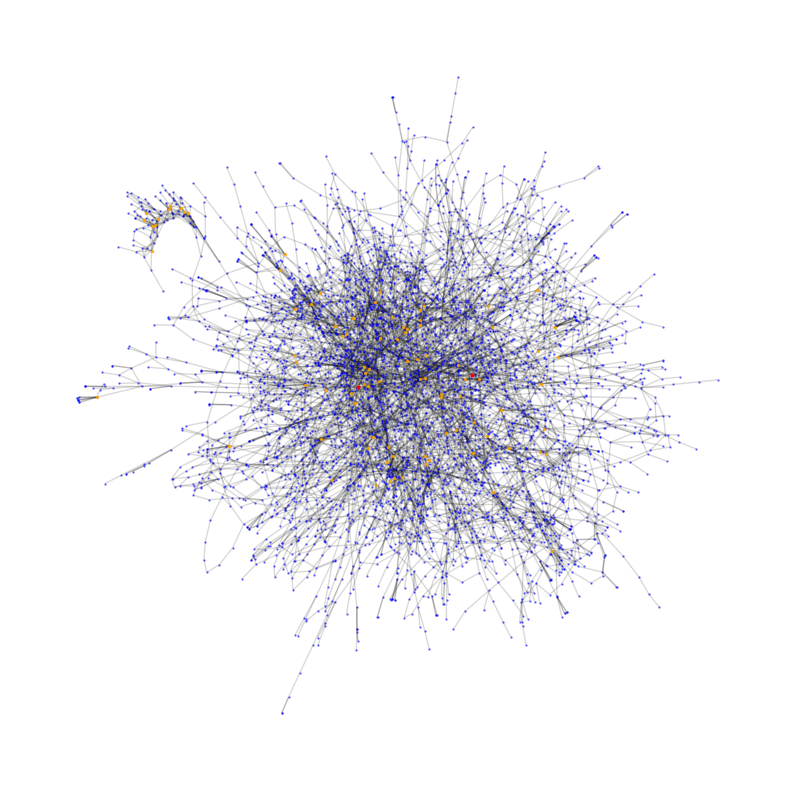

In [44]:
# Set a layout for the graph.
pos = nx.spring_layout(G, seed=23)

plt.figure(figsize=(10,10))

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.15)

# Draw normal nodes
normal_nodes = [node for node in G.nodes() if node not in critical_articuplations and node not in critical_central_nodes]
nx.draw_networkx_nodes(G, pos, nodelist=normal_nodes, node_color='blue', node_size=0.5, alpha=0.5)

# Draw the critical articulation points in red
nx.draw_networkx_nodes(G, pos, nodelist=critical_articuplations, node_color='red', node_size=3.5, alpha=1)

# Draw the critical central nodes in orange
nx.draw_networkx_nodes(G, pos, nodelist=critical_central_nodes, node_color='orange', node_size=2.0, alpha=0.8)

# Hide the axes
plt.axis('off')

plt.show()

## 6 - Conclusions

Throughout this project, we have studied the structure and resilience of a complex network using various network analysis techniques. These include network visualisations, degree distributions, and multiple centrality measures, which we leveraged to derive insights into the network's topology and pinpoint key nodes.

A particular focus of our study was the network's vulnerability to failures. Random node failures, targeted attacks on nodes with high centrality values, and the failure of articulation points and bridges were analysed.

Our analysis revealed that while the network exhibits mild resilience to random failures, specific nodes, especially the articulation points, play crucial roles in preserving network connectivity. 
